### Introduction

Here you'll learn to build models using Catboost, Lightgbm and NaiveBayes algorithm in Python. Given the text classification problem, you'll also learn to clean data, create bag of words matrix, tf-idf matrix. 

On top of what's done here, next you can create a simple voting ensemble from the predictions generated from these models here.

In [1]:
# Load Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
train = pd.read_csv("Dataset/mushroom_train.csv")
test = pd.read_csv("Dataset/mushroom_test.csv")

In [3]:
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,...,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,...,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,...,w,w,p,w,36,o,p,n,s,m


In [4]:
test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,f,c,b,u,t,...,p,g,p,w,23,o,p,k,y,d
1,x,y,g,f,f,f,c,b,g,e,...,b,b,p,w,23,o,l,h,v,d
2,b,s,w,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,s,m
3,f,y,y,f,f,f,c,b,p,e,...,n,b,p,w,53,o,l,h,y,d
4,b,y,y,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,n,m


In [5]:
print ("Train length: ", len(train))
print ("Test  length: ", len(test))

Train length:  5686
Test  length:  2438


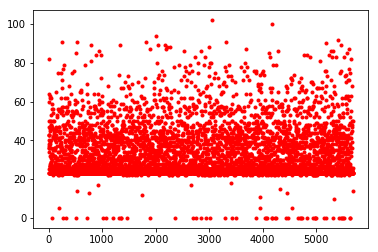

In [6]:
plt.plot(train['weight'].tolist(), 'r.')

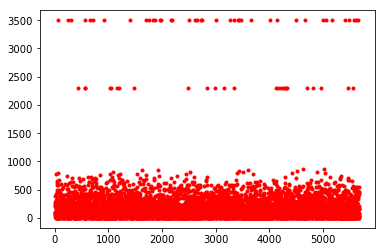

In [7]:
plt.plot(train['radius'].tolist(), 'r.')

In [8]:
#Create a new function:
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print ("Missing values per column: (NO missing values)")
print (train.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
print ("\nMissing values per row: (NO missing values)")
print (train.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column: (NO missing values)
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
radius                      0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
weight                      0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Missing values per row: (NO missing values)
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [9]:
#train.dtypes, test.dtypes

In [10]:
test['class'] = np.nan

In [11]:
# label encode categorical features in data given
cols = train.columns.tolist()
cols.remove("class")
cols.remove("radius")
cols.remove("weight")
print (len(cols))

22


In [12]:
# label encode categorical features in data given

for x in cols:
    lbl = LabelEncoder()
    train[x] = lbl.fit_transform(train[x])
    test[x] = lbl.transform(test[x])

In [13]:
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,2,2,2,0,7,1,0,1,0,...,6,7,0,2,38,1,0,7,4,2
1,p,5,3,8,1,6,1,0,1,4,...,7,7,0,2,43,1,4,3,4,5
2,e,2,2,4,1,5,1,0,0,1,...,2,2,0,2,37,2,0,7,1,6
3,p,5,2,2,0,8,1,0,1,0,...,6,7,0,2,82,1,0,7,4,2
4,e,5,2,8,1,3,1,0,0,5,...,7,7,0,2,36,1,4,3,3,3


In [14]:
test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,0,3,1,5,1,0,0,9,1,...,3,0,2,23,1,4,2,5,0,NaN
1,5,3,3,0,2,1,0,0,2,0,...,0,0,2,23,1,2,1,4,0,NaN
2,0,2,8,1,0,1,0,0,10,0,...,7,0,2,24,1,4,2,3,3,NaN
3,2,3,9,0,2,1,0,0,7,0,...,0,0,2,53,1,2,1,5,0,NaN
4,0,3,9,1,0,1,0,0,10,0,...,7,0,2,24,1,4,2,2,3,NaN


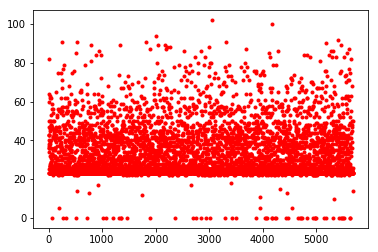

In [15]:
plt.plot(train['weight'].tolist(), 'r.')

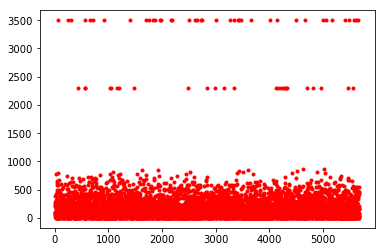

In [16]:
plt.plot(train['radius'].tolist(), 'r.')

In [17]:
### set target variable

train['class'] = [1 if x == 'p' else 0 for x in train['class']]

In [18]:
cols = train.columns.tolist()
cols.remove('class')

x = train.drop(['class'], axis=1).as_matrix()
xtest = test.drop(['class'], axis=1).as_matrix()

y = train['class'].as_matrix()

### Various Models

In [19]:
### Decision Trees
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x, y)

pred = clf.predict(x)
print (accuracy_score(y, pred))

test_pred = clf.predict(xtest)

1.0


In [20]:
### SVM
from sklearn import svm
clf = svm.SVC()
clf.fit(x, y)

pred = clf.predict(x)
print (accuracy_score(y, pred))

test_pred = clf.predict(xtest)

0.998768906085


In [22]:
### XGBoost
import xgboost
clf = xgboost.XGBClassifier()
clf.fit(x, y)

pred = clf.predict(x)
print (accuracy_score(y, pred))

test_pred = clf.predict(xtest)

1.0


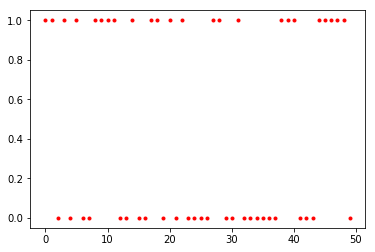

In [23]:
plt.plot(pred[:50], 'r.')

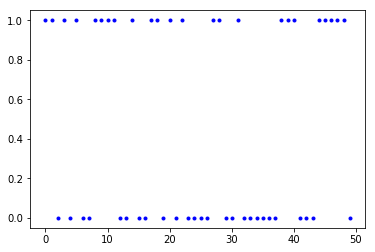

In [24]:
plt.plot(y[:50], 'b.')

# ------------------------------ END -----------------------------------

### NaiveBayes

In [ ]:
x.shape, y.shape, xtest.shape

In [ ]:
# let's check cross validation score of the model
# cv score acts a unbiased estimate of models accuracy on unseen data

mod1 = GaussianNB()

In [ ]:
## Naive Bayes 1
print(cross_val_score(mod1, train_feats, target, cv=24, scoring=make_scorer(accuracy_score)))

In [ ]:
# make our first set of predictions

clf1 = GaussianNB()
clf1.fit(train_feats, target)

In [ ]:
preds1 = clf1.predict(train_feats)

In [ ]:
accuracy_score(target.tolist(), preds1)

### LightGBM - 1

We are prefering lightgbm over xgboost because of its speed. <br />
In this model, we'll use count features for model training.

In [ ]:
import lightgbm as lgb

In [ ]:
# set the data in format lgb accepts
d_train = lgb.Dataset(train_feats, label = target)

In [ ]:
## set parameters
## you can tune the parameters can try to better score

params = {'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_error',
    'learning_rate': 0.05, 
    'max_depth': 7, 
    'num_leaves': 21, 
    'feature_fraction': 0.3, 
    'bagging_fraction': 0.8, 
    'bagging_freq': 5}

In [ ]:
lgb_cv = lgb.cv(params, d_train, num_boost_round=500, nfold= 5, shuffle=True, stratified=True, verbose_eval=20, early_stopping_rounds=40)

In [ ]:
## get nround value which hd lowest error
nround = lgb_cv['binary_error-mean'].index(np.min(lgb_cv['binary_error-mean']))

In [ ]:
## train the model
model = lgb.train(params, d_train, num_boost_round=nround)

In [ ]:
## make predictions
preds2 = model.predict(train_feats)

def to_labels(x):
    if x > 0.0:  # cutoff - you can change it and see if accuracy improves or plot AUC curve. 
        return 1
    return 0

preds2 = list(map(to_labels, preds2))

In [ ]:
count = 0
for i in range(len(train)):
    if train['class'][i] == 1:
        count += 1
print (count)

In [ ]:
2741/len(train)

In [ ]:
accuracy_score(target.tolist(), preds2)

In [ ]:
# make submission

def to_labels(x):
    if x > 0.66:  # cutoff - you can change it and see if accuracy improves or plot AUC curve. 
        return "happy"
    return "not_happy"

sub3 = pd.DataFrame({'User_ID':test.User_ID, 'Is_Response':preds})
sub3['Is_Response'] = sub3['Is_Response'].map(lambda x: to_labels(x))
sub3 = sub3[['User_ID','Is_Response']]
sub3.to_csv('submissions/sub3_lgb.csv', index=False) # 0.85518

### LightGBM - 2

In this model, we'll use tf-idf features for model training.

In [ ]:
# set data format
d_train = lgb.Dataset(train_feats2, label = target)

In [ ]:
# same parameters as above
params = {'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_error',
    'learning_rate': 0.05, 
    'max_depth': 5, 
    'num_leaves': 11,
    'feature_fraction': 0.3, 
    'bagging_fraction': 0.8, 
    'bagging_freq': 5}

In [ ]:
## do cross validation to find nround i.e. at this round (iteration) we can expect lowest error
lgb_cv = lgb.cv(params, d_train, num_boost_round=500, nfold= 5, shuffle=True, stratified=True, verbose_eval=20, early_stopping_rounds=40)

In [ ]:
# get nround value
nround = lgb_cv['binary_error-mean'].index(np.min(lgb_cv['binary_error-mean']))

In [ ]:
# train model
model = lgb.train(params, d_train, num_boost_round=nround)

In [ ]:
# make prediction
preds = model.predict(test_feats2)

In [ ]:
# make submission

def to_labels(x):
    if x > 0.66:
        return "happy"
    return "not_happy"

sub4 = pd.DataFrame({'User_ID':test.User_ID, 'Is_Response':preds})
sub4['Is_Response'] = sub4['Is_Response'].map(lambda x: to_labels(x))
sub4 = sub4[['User_ID','Is_Response']]
sub4.to_csv('submissions/sub4_lgb.csv', index=False) # 0.84925

### CatBoost

Catboost is a new package recently launched by Yandex. It is said that it works well when the data has many categorical features. We'll use it on count data and see it our model improves.

In [ ]:
## import library
from catboost import CatBoostClassifier,cv, Pool

In [ ]:
## catboost accepts categorical columns as a list of column numbers. In this data, all columns are categorical
cat_cols = [x for x in range(502)] ## 502 == train_feats1.shape[1] 

In [ ]:
## set parameters
## you can refer the parameters here: https://tech.yandex.com/catboost/doc/dg/concepts/python-reference_parameters-list-docpage/#python-reference_parameters-list
param = {
    'use_best_model':True,
    'loss_function':'CrossEntropy',
    'eval_metric':'Accuracy',
    'iterations':1000,
    'depth':6,
    'learning_rate':0.03,
    'rsm':0.3,
    'random_seed':2017,
    
    
}

In [ ]:
## for doing cross validation, set data in Pool format
my_dt =  Pool(train_feats1, 
           label=target,
           cat_features=cat_cols,
           column_description=None,
           delimiter='\t',
           has_header=None,
           weight=None, 
           baseline=None,
           feature_names=None,
           thread_count=1)

In [ ]:
## run cv to get best iteration
ctb_cv = cv(param, my_dt, fold_count=5, random_seed=2017)

In [ ]:
# fetch best round
best_round = ctb_cv['b\'Accuracy\'_test_avg'].index(np.max(ctb_cv['b\'Accuracy\'_test_avg']))

In [ ]:
## define the classifer model
model = CatBoostClassifier(iterations=best_round, learning_rate=0.03,rsm = 0.3 ,depth=6, eval_metric='Accuracy', random_seed=2017)

In [ ]:
## train model
model.fit(my_dt)

In [ ]:
## make predictions
preds = model.predict(test_feats1)

In [ ]:
## make submission
sub5 = pd.DataFrame({'User_ID':test.User_ID, 'Is_Response':preds})
sub5['Is_Response'] = ['happy' if x == 1 else 'not_happy' for x in sub5['Is_Response']]
sub5 = sub5[['User_ID','Is_Response']]
sub5.to_csv('submissions/sub5_cb.csv', index=False)